##  <u> *Exploratory Data Analysis - EDA*  </u>

In [5]:
#%run C:\Users\Omar\Desktop\Omar_Files\Python_Analysis\Auto_Insurance\Notebooks\Data_Analysis\2_DataCleaning&Preperations.ipynb

In [276]:
df=pd.read_csv(r"C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Auto_Insurance/Data_Sets/new_cleaned_df.csv")

In [277]:
df.head()

,veh_value,exposure,clm,numclaims,claimcst0,veh_body,veh_age,gender,area,agecat,severity,frequincy,pure_premium
0,1060.0,0.303901,0,0,0.0,HBACK,3,F,C,2,0.0,0.0,0.0
1,1030.0,0.648871,0,0,0.0,HBACK,2,F,A,4,0.0,0.0,0.0
2,3260.0,0.569473,0,0,0.0,UTE,2,F,E,2,0.0,0.0,0.0
3,4140.0,0.317591,0,0,0.0,STNWG,2,F,D,2,0.0,0.0,0.0
4,720.0,0.648871,0,0,0.0,HBACK,4,F,C,2,0.0,0.0,0.0


---

## *Descrirptive statistics*

### *A.* <u>*categorical & numerical_features:*</u>

In [161]:
df["numclaims"]=df["numclaims"].astype("object")
df["clm"]=df["clm"].astype("object")
df["agecat"]=df["agecat"].astype("object")
df["veh_age"]=df["veh_age"].astype("object")

In [162]:
categorical_features=df.select_dtypes(include=["object"])
numerical_features=df.select_dtypes(exclude=["object"])

In [163]:
print("we have {} numerical features : {}\n".format(numerical_features.shape[1],list(numerical_features.columns)))
print("we have {} categorical features : {}".format(categorical_features.shape[1],list(categorical_features.columns)))

we have 6 numerical features : ['veh_value', 'exposure', 'claimcst0', 'severity', 'frequincy', 'pure_premium']

we have 7 categorical features : ['clm', 'numclaims', 'veh_body', 'veh_age', 'gender', 'area', 'agecat']


---

### *B.* <u>*Basic data statistics:*</u>

* #### *Numerical data statistics :*

In [84]:
df.describe()

,veh_value,exposure,claimcst0,severity,frequincy,pure_premium
count,67856.000000,67856.000000,67856.000000,67856.000000,67856.000000,6.785600e+04
mean,1777.020650,0.468609,137.270167,130.581349,0.214160,7.552586e+02
std,1205.231609,0.290121,1056.297768,1024.457088,2.880223,3.122359e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1010.000000,0.220000,0.000000,0.000000,0.000000,0.000000e+00
50%,1500.000000,0.450000,0.000000,0.000000,0.000000,0.000000e+00
75%,2150.000000,0.710000,0.000000,0.000000,0.000000,0.000000e+00
max,34560.000000,1.000000,55922.129883,55922.000000,365.250000,5.238879e+06


* #### *Categorical data statistics :*

In [85]:
df.describe(include="object")

,clm,numclaims,veh_body,veh_age,gender,area,agecat
count,67856,67856,67856,67856,67856,67856,67856
unique,2,5,13,4,2,6,6
top,0,0,SEDAN,3,F,C,4
freq,63232,63232,22233,20064,38603,20540,16189


---

### *C.* <u>*EDA - Data Visualization:*</u>

* ####  <u> *Numerical features Visualization :*  </u>

In [164]:
# creating one function for plotting numerical_features
def plot_numerical_features(numerical_features,ChartType):
    nrows = 2
    ncols = 3

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,5))
    
    axes = axes.flatten()

    for i, column in enumerate(numerical_features.columns):
        if i >= nrows * ncols:
            break 
        numerical_features[column].plot(ax=axes[i], kind=f"{ChartType}")

    plt.tight_layout()
    plt.show()

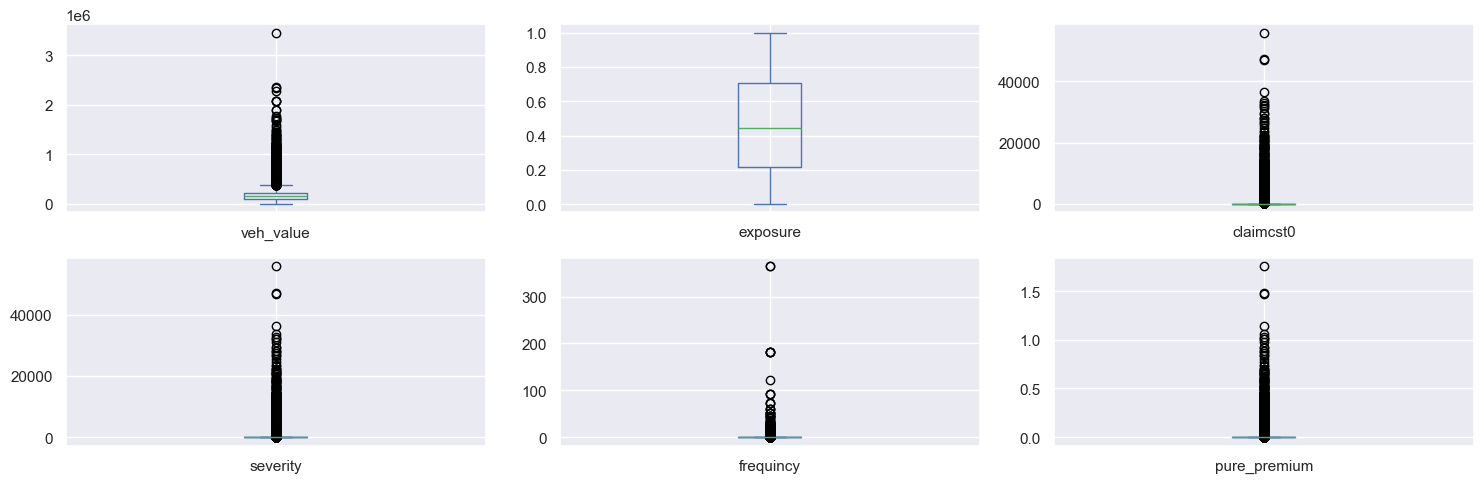

In [165]:
plot_numerical_features(numerical_features,"box")

* ####  <u> *Categorical features Visualization :*  </u>

In [88]:
# creating one function for plotting categorical_features
def plot_categorical_features(categorical_features):
    nrows = 3
    ncols = 3
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

    axes = axes.flatten()
    
    for i, column in enumerate(categorical_features.columns):
        if i >= nrows * ncols:
            break 
        ax = axes[i]
        counts = categorical_features[column].value_counts()
        counts.plot(kind='bar', ax=ax, title=column)
        
        for bar in ax.patches:
            ax.annotate(
                str(bar.get_height()),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points'
            )
        
    plt.tight_layout()
    plt.show()

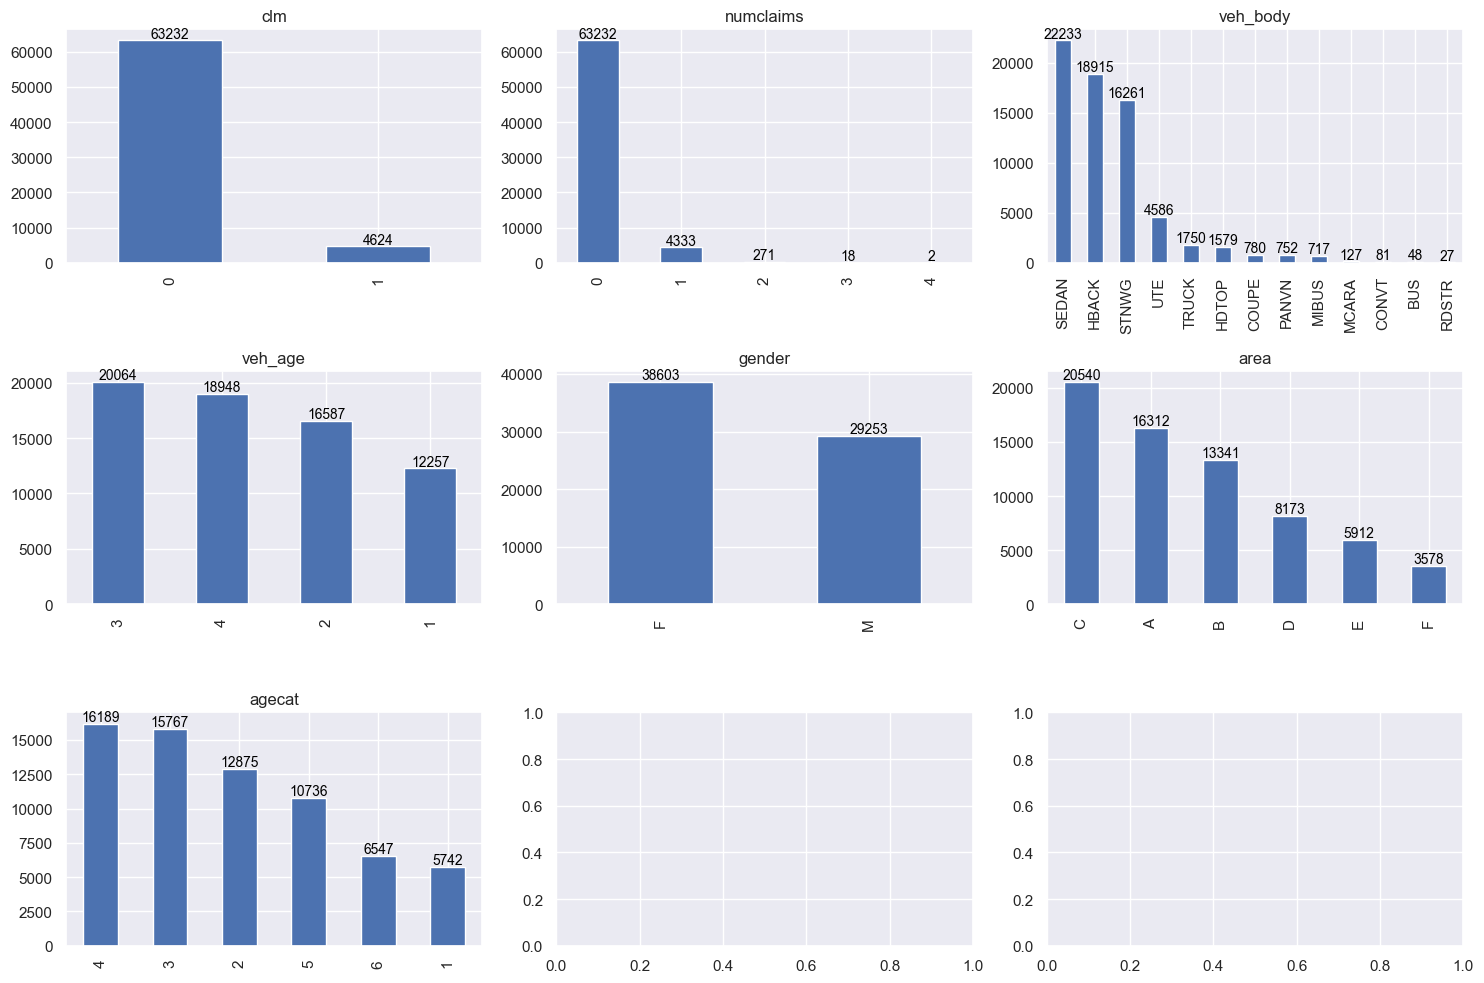

In [89]:
plot_categorical_features(categorical_features)

---

### *C.* <u>*EDA Correlation*</u>

<Axes: >

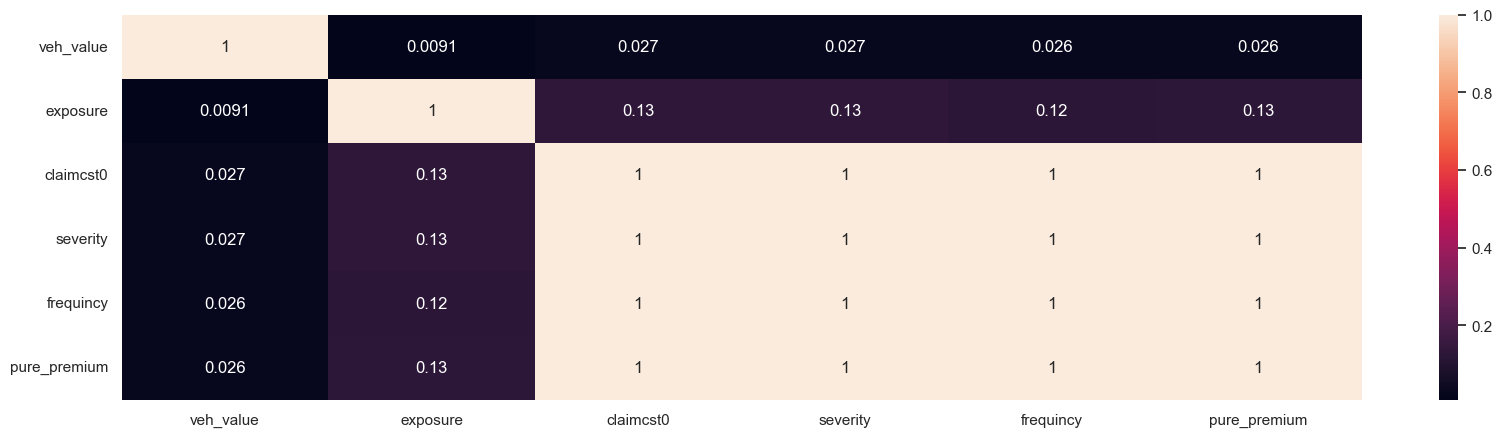

In [90]:
plt.subplots(figsize=(20,5))
sns.heatmap(numerical_features.corr(method="spearman"),annot=True)

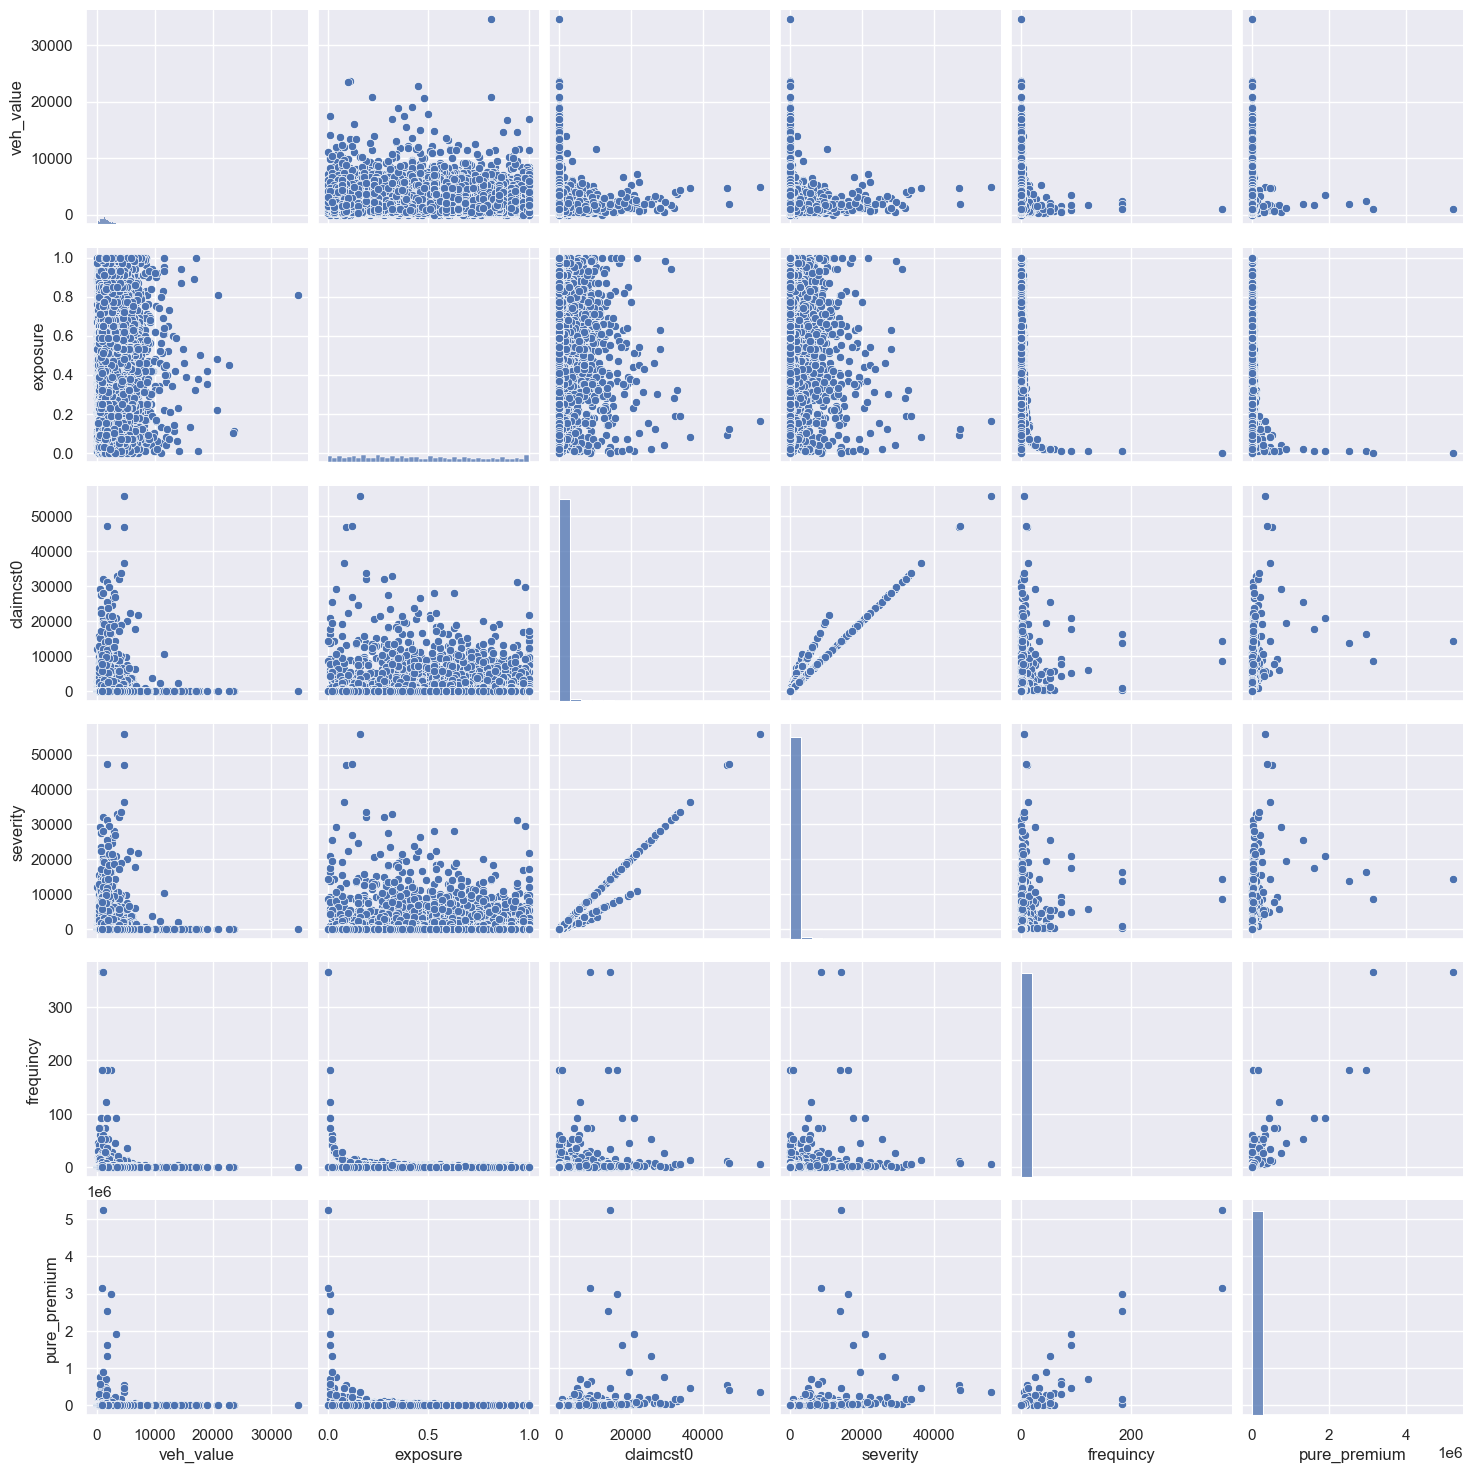

In [91]:
sns.pairplot(numerical_features);

---

## *D. Further EDA*

*Creating one function to get all needed data*

In [298]:
def summary(feature):
    TotalClaimsCount=pd.DataFrame(df.groupby(f"{feature}")["numclaims"].sum())
    Totalexposure=pd.DataFrame(round(df.groupby(f"{feature}")["exposure"].sum()))
    TotalClaims=pd.DataFrame(round(df.groupby(f"{feature}")["claimcst0"].sum()))
    TotalCount=pd.DataFrame(df.groupby(f"{feature}")[f"{feature}"].count())
    Totalfrequincy=pd.DataFrame(round(df.groupby(f"{feature}")["frequincy"].mean(),4)*100)
    Totalseverity=pd.DataFrame(round(df.groupby(f"{feature}")["severity"].mean()))
    Totalpure_premium=pd.DataFrame(round(df.groupby(f"{feature}")["pure_premium"].mean()))
    return pd.concat([TotalClaimsCount, Totalexposure, TotalClaims,TotalCount,Totalfrequincy,Totalseverity,Totalpure_premium],axis=1)

* *Gender_Summary*

In [299]:
gender_Summary=summary('gender')
gender_Summary

,numclaims,exposure,claimcst0,gender,frequincy,severity,pure_premium
gender,,,,,,,
F,2832,17955.0,4908749.0,38603,22.69,121.0,768.0
M,2105,13846.0,4405855.0,29253,19.74,143.0,739.0


* *Veh_body_Summary*

In [300]:
veh_body_Summary=summary('veh_body')
veh_body_Summary

,numclaims,exposure,claimcst0,veh_body,frequincy,severity,pure_premium
veh_body,,,,,,,
BUS,10,26.0,13363.0,48,35.67,255.0,612.0
CONVT,3,33.0,6889.0,81,6.31,85.0,183.0
COUPE,75,319.0,187723.0,780,26.89,216.0,649.0
HBACK,1330,8810.0,2589136.0,18915,22.82,131.0,585.0
HDTOP,136,783.0,294812.0,1579,18.56,181.0,419.0
MCARA,15,59.0,10674.0,127,27.47,81.0,149.0
MIBUS,45,317.0,116105.0,717,13.00,159.0,357.0
PANVN,68,409.0,133113.0,752,16.15,171.0,584.0
RDSTR,3,12.0,1369.0,27,15.70,29.0,77.0


* *Veh_age_Summary*

In [301]:
veh_age_Summary=summary('veh_age')
veh_age_Summary

,numclaims,exposure,claimcst0,veh_age,frequincy,severity,pure_premium
veh_age,,,,,,,
1,876,5339.0,1555255.0,12257,17.64,122.0,482.0
2,1354,7924.0,2486217.0,16587,23.99,142.0,941.0
3,1446,9542.0,2718237.0,20064,22.77,129.0,937.0
4,1261,8996.0,2554895.0,18948,20.19,127.0,578.0


* *Area_Summary*

In [302]:
area_Summary=summary('area')
area_Summary

,numclaims,exposure,claimcst0,area,frequincy,severity,pure_premium
area,,,,,,,
A,1181,7597.0,2071766.0,16312,17.57,119.0,407.0
B,1021,6298.0,1795295.0,13341,24.26,129.0,559.0
C,1493,9578.0,2865707.0,20540,21.37,134.0,761.0
D,524,3820.0,911058.0,8173,25.05,105.0,1645.0
E,413,2772.0,868823.0,5912,18.79,141.0,545.0
F,305,1736.0,801955.0,3578,24.69,213.0,1360.0


* *Agecat_Summary*

In [303]:
agecat_Summary=summary('agecat')
agecat_Summary

,numclaims,exposure,claimcst0,agecat,frequincy,severity,pure_premium
agecat,,,,,,,
1,525,2612.0,1307373.0,5742,37.99,217.0,1977.0
2,1000,5892.0,1984841.0,12875,20.26,146.0,469.0
3,1189,7409.0,2132107.0,15767,20.93,128.0,757.0
4,1185,7617.0,2145303.0,16189,21.84,126.0,740.0
5,648,5171.0,1061412.0,10736,17.46,95.0,585.0
6,390,3100.0,683569.0,6547,15.78,99.0,558.0


---